In [5]:
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor as xgb

In [10]:
import numpy as np

In [6]:
df_train = pd.read_csv('train.csv')
print(df_train.shape)
df_train.info()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [7]:
# Declaring a Global Variable
encoder = None

def init_encoder():
    cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'SaleType', 'SaleCondition']
    global encoder
    encoder = ce.target_encoder.TargetEncoder(cols=cols)

In [8]:
# Declaring the global variables in order to plot the Correlation Matrix
df_res_6th = None
df_sp_6th = None

# This is the pre-processing function, which contains all the pre-processing steps
def pre_process(df, is_train):
    # 1st Step
    ids = df["Id"]
    if is_train:
        y = df["SalePrice"]
        # Storing the SalePrice for plotting the correlation matrix
        global df_sp_6th
        df_sp_6th = y
        y = np.log(y)
        df.drop(["Id", "SalePrice"], axis=1, inplace=True)
    else:
        df.drop(["Id"], axis=1, inplace=True) 
    
    # 2nd Step
    df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
    
    # Pre-requisites for 3rd and 4th steps
    dtypes = df.dtypes
    cols = df.columns
    med_cols = []
    fre_cols = []
    for i in range(len(cols)):
        if(dtypes[i] == 'int64' or dtypes[i] == 'float64'):
            med_cols.append(cols[i])
        else:
            fre_cols.append(cols[i])
    
    # 3rd Step
    for col in med_cols:
        df[col] = df[col].fillna(df[col].median()) 
    
    # 4th Step
    for col in fre_cols:
        df[col] = df[col].fillna(df[col].value_counts().index[0])
        
    # 5th Step
    labels = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
    cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
            'FireplaceQu', 'GarageQual', 'GarageCond']
    for col in cols:
        df[col] = [labels[df[col][i]] for i in range(df.shape[0])]
    
    # 6th Step
    if is_train:
        init_encoder()
        df = encoder.fit_transform(df, y)
        # Storing the dataset for plotting the correlation matrix
        global df_res_6th
        df_res_6th = df
    else:
        df = encoder.transform(df)
    
    # Comment from 7th step to the last step to obtain the pre-processed data after the 6th step.
    # 7th Step
    cols = ['GrLivArea', 'GarageArea', '1stFlrSF']
    df = df.drop(columns=cols, axis=1)
    
    if is_train:
        return df, y, ids
    else:
        return df, ids

In [11]:
X, y, train_id =  pre_process(df_train, is_train = True)
print(train_id.shape)
X.info()

C:\Users\utilisateur\anaconda3\envs\tf\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(1460,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   float64
 5   LotShape       1460 non-null   float64
 6   LandContour    1460 non-null   float64
 7   Utilities      1460 non-null   float64
 8   LotConfig      1460 non-null   float64
 9   LandSlope      1460 non-null   float64
 10  Neighborhood   1460 non-null   float64
 11  Condition1     1460 non-null   float64
 12  Condition2     1460 non-null   float64
 13  BldgType       1460 non-null   float64
 14  HouseStyle     1460 non-null   float64
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  

(76, 76)
(20, 76)


<AxesSubplot:>

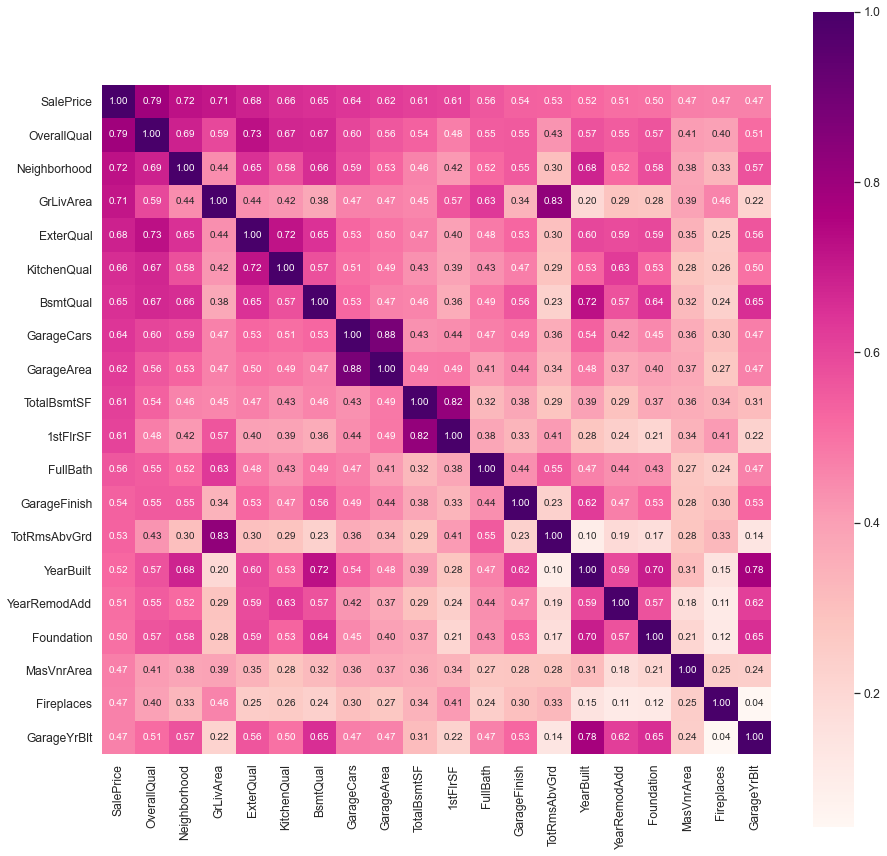

In [12]:
# In order to find out the further pre-processing steps (after 6th), we need to look at the 
# pre-processed data we obtained after the 6th step.

df_6th = pd.concat([df_res_6th, df_sp_6th], axis=1)
df_6th.head()

# We are trying to find PCC (Pearson Co-relation Coefficient) between features, so that
# we can eliminate some of the redundant features
cor_mat = df_6th.corr(method='pearson', min_periods=50)
print(cor_mat.shape)

# We will find out the 20 pair of features which have the largest value of PCC 
cols = cor_mat.nlargest(20, "SalePrice")
print(cols.shape)

plt.figure(figsize = (15,15))
sns.set(font_scale = 1.1)
sns.heatmap(
    cols[cols.index], cbar = True, annot = True, square = True, cmap = "RdPu" , 
    fmt = ".2f", annot_kws = {"size": 10}, yticklabels = cols.index, 
    xticklabels = cols.index
)

# Based on this co-relation plot, we will be eliminating one feature from the pair of features 
# having value of PCC >= 0.80. We will be eliminating 'GrLivArea', 'GarageArea' and '1stFlrSF'

In [13]:
# Defining the custom metric [RMSE on Log]
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbr = GradientBoostingRegressor(
    learning_rate=0.05, n_estimators=3000, min_samples_split=15
)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print(rmse(y_test, y_pred))

0.1373900374861268


In [17]:
df_test = pd.read_csv('test.csv')
print(df_test.shape)
df_test.info()

(1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 1

In [18]:
X, test_id =  pre_process(df_test, is_train = False)
print(X.shape, test_id.shape)

(1459, 72) (1459,)


In [19]:
y_sub = gbr.predict(X)
y_sub = np.exp(y_sub) # Converting back from log scale to normal scale
submission = pd.DataFrame({"Id": test_id, "SalePrice": y_sub})
submission.head(5)

,Id,SalePrice
0,1461,115411.502639
1,1462,155462.145110
2,1463,193389.274476
3,1464,197029.212954
4,1465,192968.047731


In [21]:
y_sub

array([115411.50263927, 155462.14511002, 193389.27447628, ...,
       168191.59313666, 125569.72455745, 217624.19695174])

In [20]:
submission.to_csv("submission.csv", index = False)